In [ ]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
t, z = mnist.load_data()

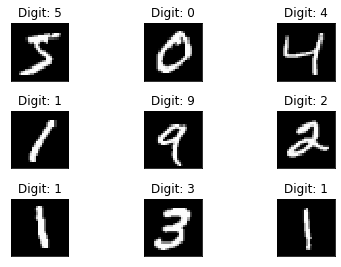

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28, 28))
X_test = X_test.reshape((X_test.shape[0], 28, 28))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

ValueError: ignored

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

In [ ]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

import keras
from keras_preprocessing.image import ImageDataGenerator

from keras import applications
from keras import optimizers
from keras.models import Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, CSVLogger

from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
img_width, img_height = 32, 32
model = VGG16(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# INITIALIZE MODEL

img_width, img_height = 32, 32
model = VGG16(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

# freeze all layers
for layer in model.layers:
    layer.trainable = False

# Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)

In [ ]:
from keras import optimizers
# creating the final model 
model_final = Model(inputs= model.input, outputs = predictions)

# compile the model 
rms = optimizers.RMSprop(lr=1e-4)
#adadelta = optimizers.Adadelta(lr=0.001, rho=0.5, epsilon=None, decay=0.0)

model_final.compile(loss = "categorical_crossentropy", optimizer = rms, metrics=["accuracy"])

In [ ]:
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )

In [ ]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model_final.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test),
          callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: ignored

In [ ]:
cd drive/My\ Drive/

/content/drive/My Drive


In [ ]:
import pandas as pd
import numpy as np

import keras
from keras_preprocessing.image import ImageDataGenerator

from keras import applications
from keras import optimizers
from keras.models import Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, CSVLogger

from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
img_width, img_height = 32, 32
model = VGG16(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
for layer in model.layers:
    layer.trainable = False


In [ ]:
# Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)

In [ ]:
# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

In [ ]:
# compile the model 
rms = optimizers.RMSprop(lr=1e-4)

In [ ]:
model_final.compile(loss = "categorical_crossentropy", optimizer = rms, metrics=["accuracy"])

In [ ]:
train = pd.read_csv('MNIST CSV Dataset/mnist_train.csv')
val = pd.read_csv('MNIST CSV Dataset/mnist_test.csv')

In [ ]:
train.shape

(60000, 785)

In [ ]:
val.shape

(10000, 785)

In [ ]:
nb_train_samples = 60000
nb_validation_samples = 10000
batch_size = 60
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory=None,
                                                    x_col='train_samples',
                                                    y_col='train_labels',
                                                    has_ext=True,
                                                    target_size = (img_height,
                                                                   img_width),
                                                    batch_size = batch_size, 
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    classes=[0,1,2,3,4,5,6,7,8,9])

KeyError: ignored